In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

dataset from UCI machine learning dataset collection

In [20]:
KATALOG_PROJEKTU = os.path.join(os.getcwd())
KATALOG_DANYCH = os.path.join(KATALOG_PROJEKTU,"archive")
KATALOG_WYKRESOW = os.path.join(KATALOG_PROJEKTU, "wykresy")
os.makedirs(KATALOG_WYKRESOW, exist_ok=True)


def load_data(data_path=KATALOG_DANYCH):
    csv_path = os.path.join(os.getcwd(), 'winequality-red.csv')
    return pd.read_csv(csv_path)


In [23]:
wines = load_data()
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
print(wines.columns)
#ogolne info
print(wines.info())    
#sprawdzenie czy i ile jest niekompletnych danych
wines.isnull().sum()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [29]:
print(f'\n quality: \n{wines["quality"].value_counts(sort=False, bins=2)}')
print(f'\n quality: \n{wines["quality"].value_counts(sort=False)}')
    
    
#Added sulfates preserve freshness and protect wine from oxidation,
#and unwanted bacteria and yeasts.
print(f'\n sulphates: \n{wines["sulphates"].value_counts(sort=False,bins=5)}')
print('data not balanced!!')


 quality: 
(2.994, 5.5]    744
(5.5, 8.0]      855
Name: quality, dtype: int64

 quality: 
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

 sulphates: 
(0.327, 0.664]    1006
(0.664, 0.998]     534
(0.998, 1.332]      47
(1.332, 1.666]       8
(1.666, 2.0]         4
Name: sulphates, dtype: int64
data not balanced!!


In [30]:
statistics = wines.describe()
    
for el in statistics:
    print(f"{el}  mean= {statistics[el][1]:.3f},"
            f"  min= {statistics[el][4]:.3f}, max= {statistics[el][4]:.3f}\n")
    

fixed acidity  mean= 8.320,  min= 7.100, max= 7.100

volatile acidity  mean= 0.528,  min= 0.390, max= 0.390

citric acid  mean= 0.271,  min= 0.090, max= 0.090

residual sugar  mean= 2.539,  min= 1.900, max= 1.900

chlorides  mean= 0.087,  min= 0.070, max= 0.070

free sulfur dioxide  mean= 15.875,  min= 7.000, max= 7.000

total sulfur dioxide  mean= 46.468,  min= 22.000, max= 22.000

density  mean= 0.997,  min= 0.996, max= 0.996

pH  mean= 3.311,  min= 3.210, max= 3.210

sulphates  mean= 0.658,  min= 0.550, max= 0.550

alcohol  mean= 10.423,  min= 9.500, max= 9.500

quality  mean= 5.636,  min= 5.000, max= 5.000



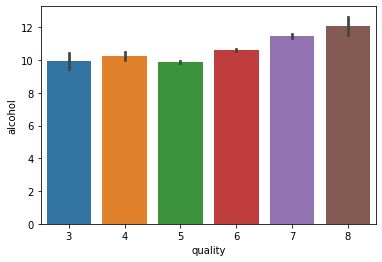

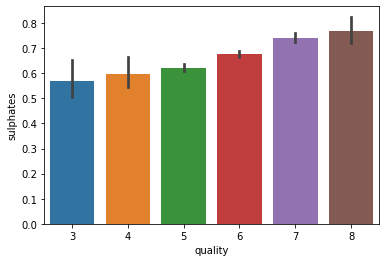

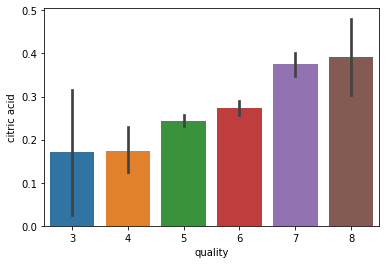

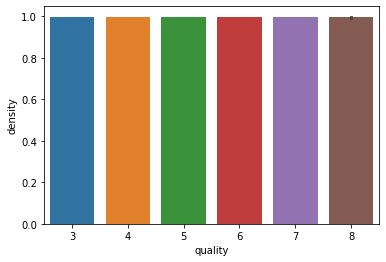

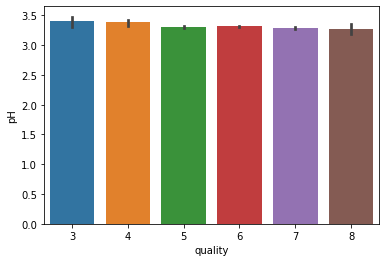

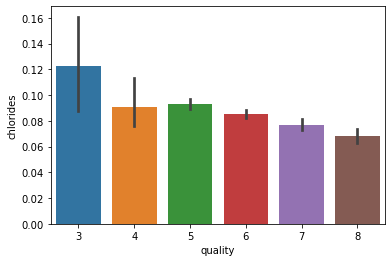

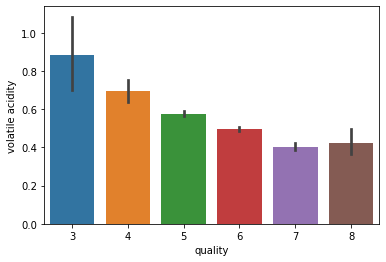

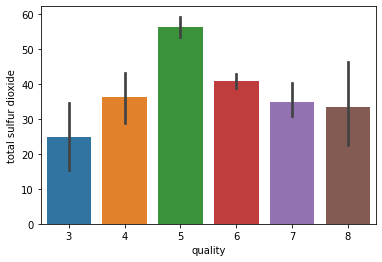

In [31]:
    sns.barplot(x='quality', y='alcohol', data=wines)
    plt.show()
    sns.barplot(x='quality', y='sulphates', data=wines)
    plt.show()
    sns.barplot(x='quality', y='citric acid', data=wines)
    plt.show()
    sns.barplot(x='quality', y='density', data=wines)
    plt.show()
    sns.barplot(x='quality', y='pH', data=wines)
    plt.show()
    sns.barplot(x='quality', y='chlorides', data=wines)
    plt.show()
    sns.barplot(x='quality', y='volatile acidity', data=wines)
    plt.show()
    sns.barplot(x='quality', y='total sulfur dioxide', data=wines)
    plt.show()


    More alcohol better wine!
    Increased level of sulphates better quality
    
    Serious increase in citric acid in high quality wines
    
    not so much going on with the quality/density 
    slight decrease in pH for wines with better quality
    
    The better the wine the less chlorides it contains
    in general less volatile acidity better quality 
    
    And not so much knowledge from quality/total sulfur dioxide graph
    

    Also as seen on the std lines, there are some outliers, some of them differs by quite big of a margin

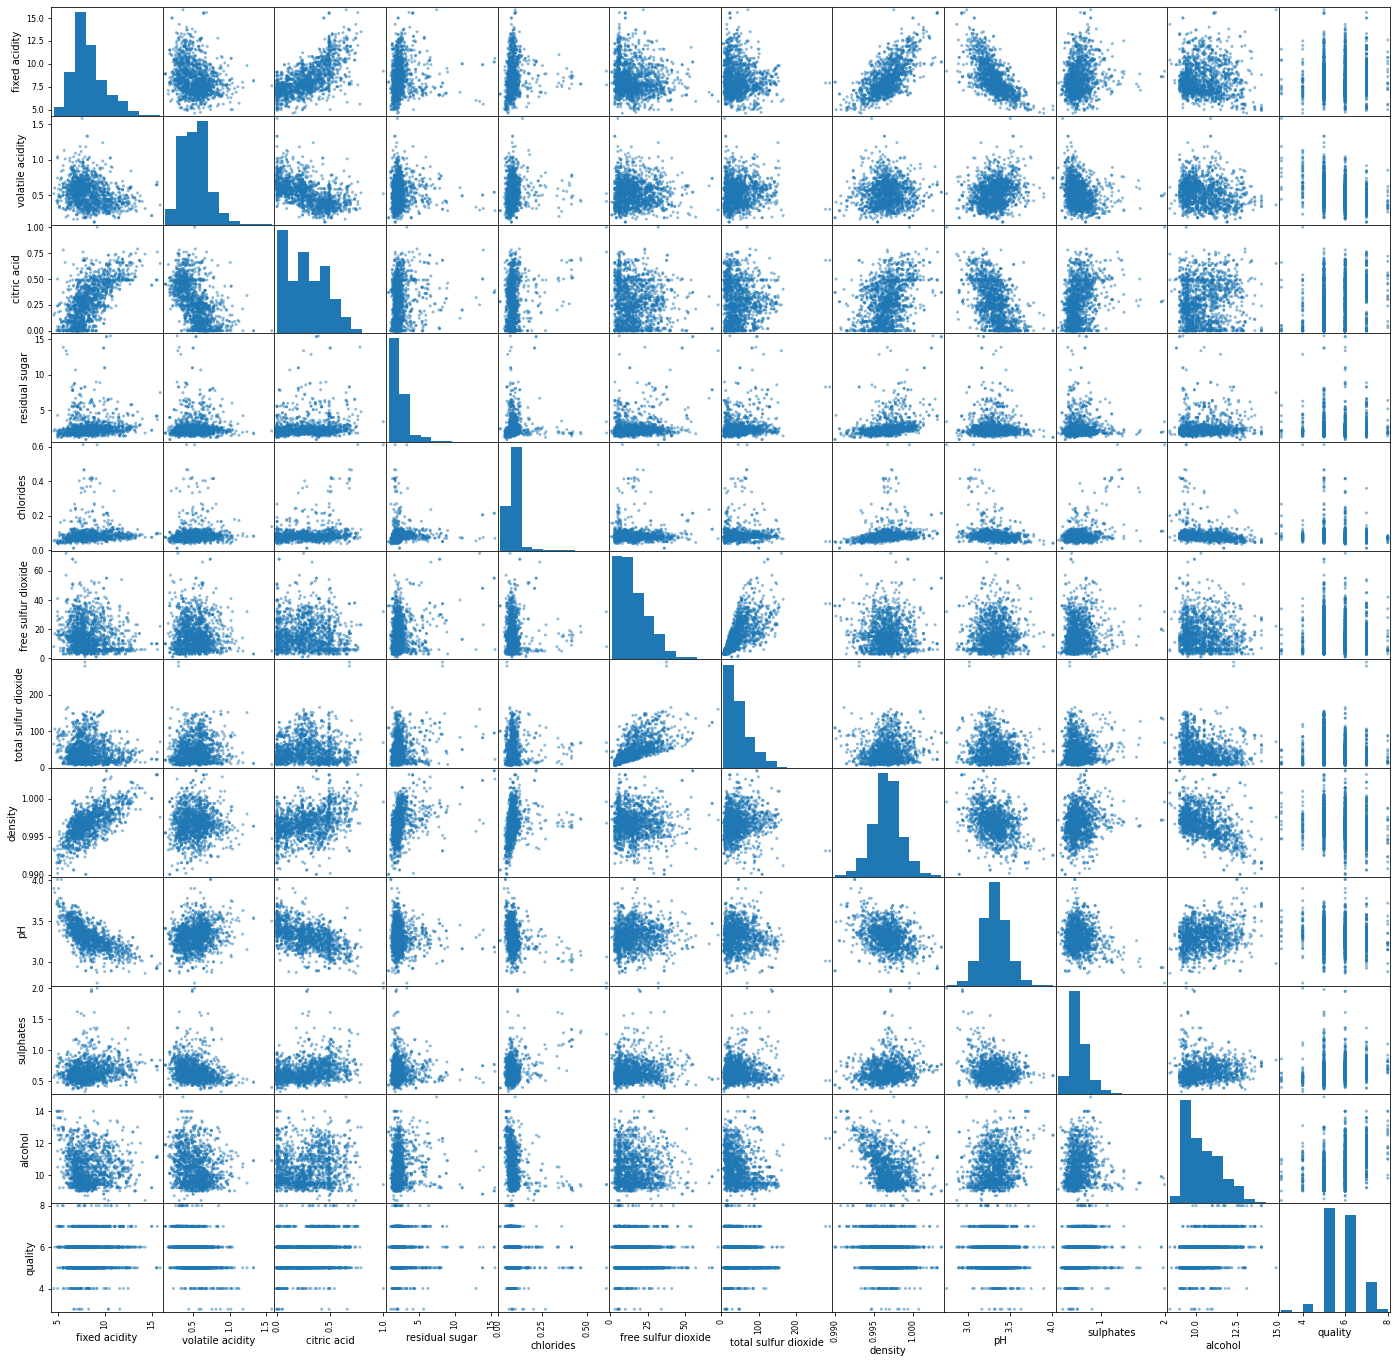

In [34]:
#visualisation of correlations 
pd.plotting.scatter_matrix(wines[wines.columns], figsize=(24,24))
plt.savefig(os.path.join(KATALOG_WYKRESOW,'correlations.jpg'), dpi=300 ) 

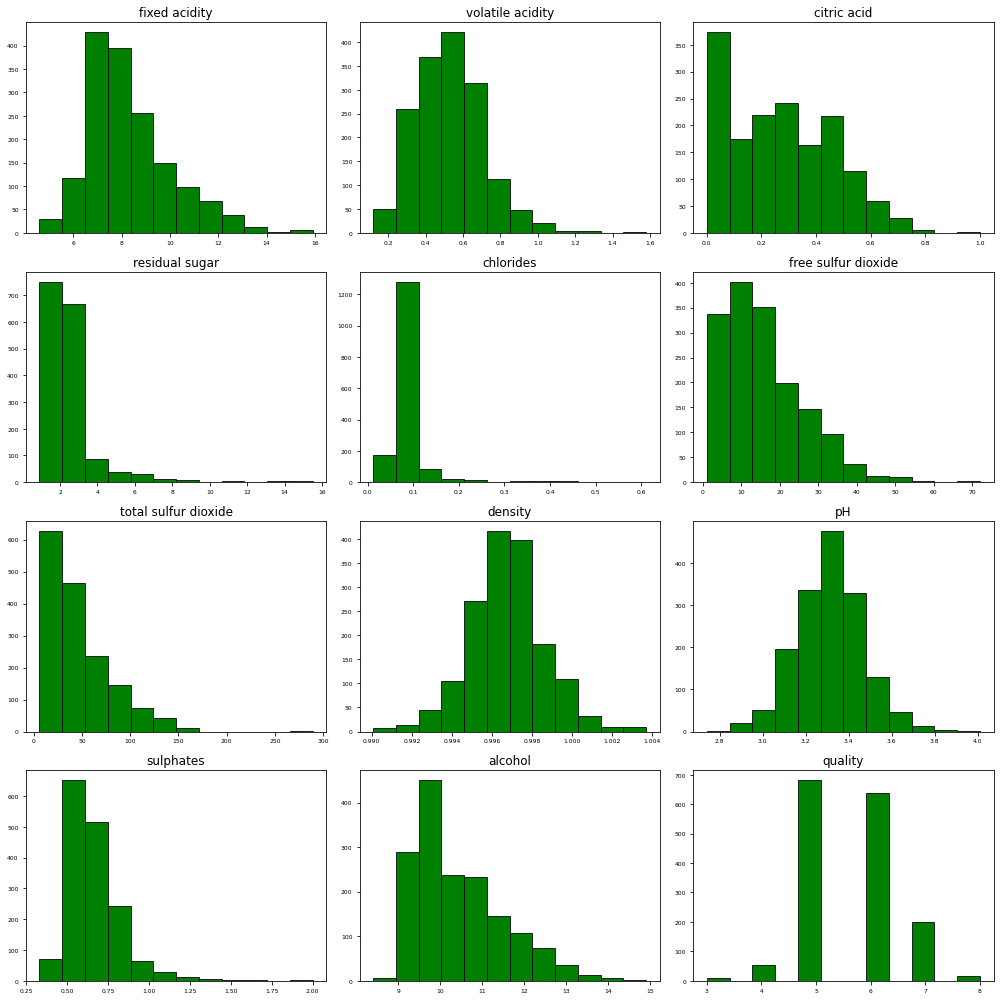

In [35]:
wines.hist(bins=12, color='green', edgecolor='black',
            xlabelsize=6, ylabelsize=6,linewidth=0.8,
            grid=False, figsize=(14,14))
plt.tight_layout(rect=(0.2, 0.2, 1.2, 1.2))
plt.savefig(os.path.join(KATALOG_WYKRESOW,'corr_2_hists.jpg'), dpi=300 )
    

In [36]:
correlation_matrix = wines.corr()
for el in wines.columns:        
    print(f"\nCorrelation with: {el}\n")
    print(f"{correlation_matrix[el].sort_values(ascending=True)}")
    


Correlation with: fixed acidity

pH                     -0.682978
volatile acidity       -0.256131
free sulfur dioxide    -0.153794
total sulfur dioxide   -0.113181
alcohol                -0.061668
chlorides               0.093705
residual sugar          0.114777
quality                 0.124052
sulphates               0.183006
density                 0.668047
citric acid             0.671703
fixed acidity           1.000000
Name: fixed acidity, dtype: float64

Correlation with: volatile acidity

citric acid            -0.552496
quality                -0.390558
sulphates              -0.260987
fixed acidity          -0.256131
alcohol                -0.202288
free sulfur dioxide    -0.010504
residual sugar          0.001918
density                 0.022026
chlorides               0.061298
total sulfur dioxide    0.076470
pH                      0.234937
volatile acidity        1.000000
Name: volatile acidity, dtype: float64

Correlation with: citric acid

volatile acidity       -0.5524

Strong correlations: < +/- 0.6 - 1 >
    
        fixed acidity - pH              <negative>
        fixed acidity - density         <positive>
        fixed acidity - citric acid     <positive>
        
        volatile acidity - citric acid  <negative>
        
        citric acid - pH                <negative>
        
        free sulfur dioxide - total sulfur dioxide <positive>

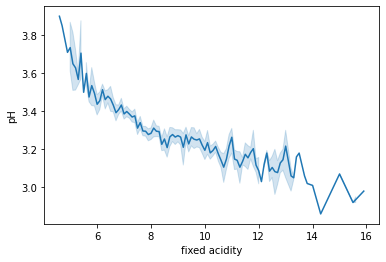

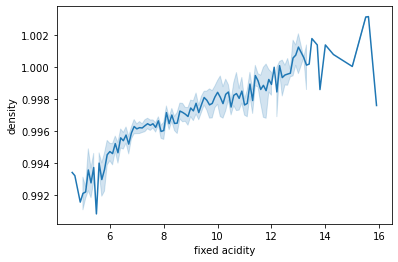

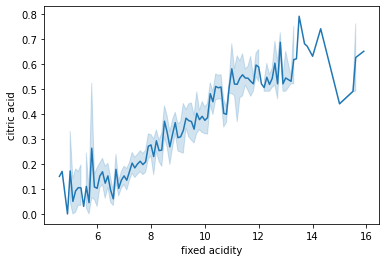

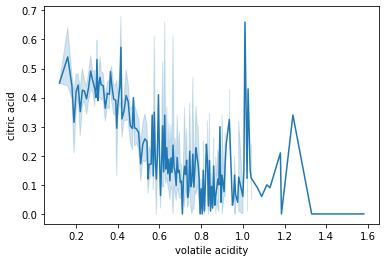

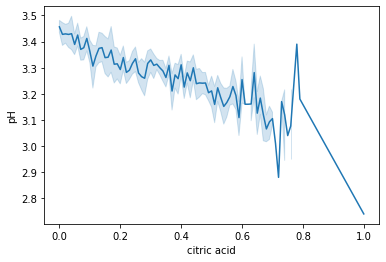

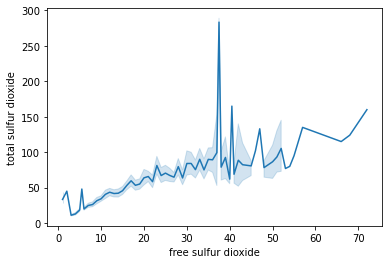

In [38]:
    sns.lineplot(data=wines,x='fixed acidity', y='pH' )
    plt.savefig(os.path.join(KATALOG_WYKRESOW,'fix_acid_by_ph.jpg'), dpi=300 ) 
    plt.show()
    
    sns.lineplot(data=wines,x='fixed acidity', y='density' )
    plt.savefig(os.path.join(KATALOG_WYKRESOW,'fix_aci_by_dens.jpg'), dpi=300 ) 
    plt.show()
    
    sns.lineplot(data=wines,x='fixed acidity', y='citric acid' )
    plt.savefig(os.path.join(KATALOG_WYKRESOW,'fixed_aci_by_citricacid.jpg'), dpi=300 ) 
    plt.show()
    
    sns.lineplot(data=wines,x='volatile acidity', y='citric acid' )
    plt.savefig(os.path.join(KATALOG_WYKRESOW,'v_aci_by_citr_aci.jpg'), dpi=300 ) 
    plt.show()
    
    sns.lineplot(data=wines,x='citric acid', y='pH' )
    plt.savefig(os.path.join(KATALOG_WYKRESOW,'citr_aci_by_ph.jpg'), dpi=300 ) 
    plt.show()
    
    sns.lineplot(data=wines,x='free sulfur dioxide',
                 y='total sulfur dioxide')
    plt.savefig(os.path.join(KATALOG_WYKRESOW,'free_sulf_diox_by_total_sulf_diox.jpg'),
                dpi=300 ) 
    plt.show()

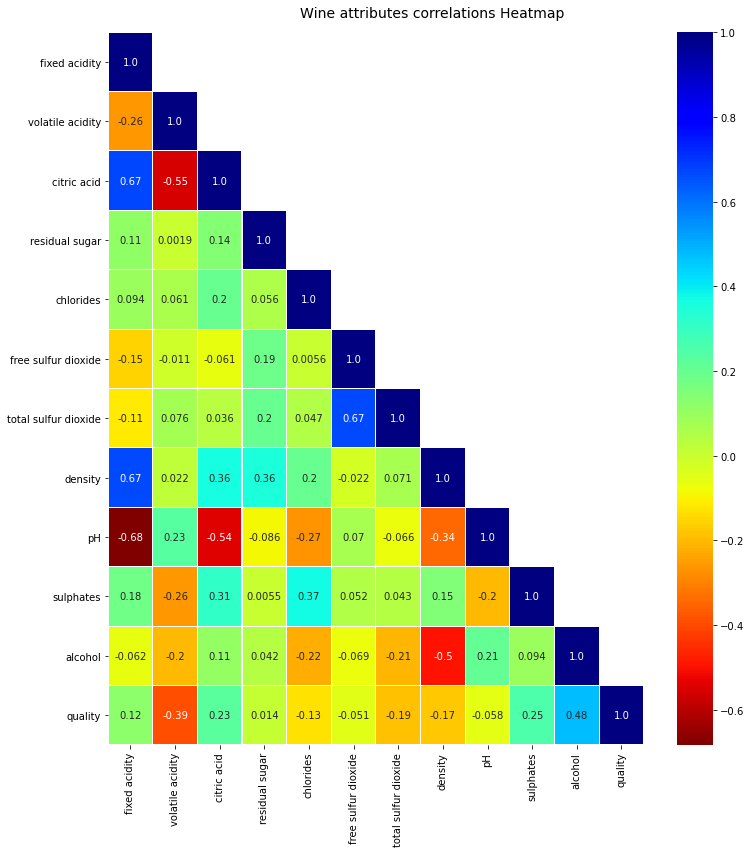

In [46]:
    #correlations in sns heatmap
    fig,ax = plt.subplots(figsize=(12,12))
    mask = np.zeros_like(correlation_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]=True # gets only half of matrix
    mask[np.diag_indices_from(mask)]=False# gets diagonal 
    
    sns.heatmap(correlation_matrix,mask=mask, annot=True, ax=ax,
                linewidths=.1, fmt='.2', cmap='jet_r')
    fig.subplots_adjust(top=0.95)
    fig.suptitle('Wine attributes correlations Heatmap', fontsize=14)
    plt.savefig(os.path.join(KATALOG_WYKRESOW,'correlations_map.jpg'), dpi=300 )
    

In [47]:
    #based on tips in the dataset
    
    wines['quality'] = pd.Categorical(wines['quality'].apply(\
                            lambda x: 'low' if x <=6.5 \
                                else 'high'))
    
    print(wines['quality'].head())
    print(wines['quality'].value_counts())

0    low
1    low
2    low
3    low
4    low
Name: quality, dtype: category
Categories (2, object): ['high', 'low']
low     1382
high     217
Name: quality, dtype: int64


In [50]:
    # to show some statistics by wine type
    pd.set_option("display.precision", 3)
    
    attributes = ['alcohol', 'sulphates', 'volatile acidity', 'pH', 'chlorides']
    
    low_info = wines[wines['quality'] == 'low'][attributes].describe()
    
    high_info = wines[wines['quality'] == 'high'][attributes].describe()
    print('*'*80,'\nlow quality wines:\n')
    print('\n',low_info)
    print('*'*80,'\n','high quality wines:')
    print('\n',high_info)
    print('*'*80)

******************************************************************************** 
low quality wines:


         alcohol  sulphates  volatile acidity        pH  chlorides
count  1382.000   1382.000          1382.000  1382.000   1382.000
mean     10.251      0.645             0.547     3.315      0.089
std       0.970      0.171             0.176     0.154      0.049
min       8.400      0.330             0.160     2.740      0.034
25%       9.500      0.540             0.420     3.210      0.071
50%      10.000      0.600             0.540     3.310      0.080
75%      10.900      0.700             0.650     3.410      0.091
max      14.900      2.000             1.580     4.010      0.611
******************************************************************************** 
 high quality wines:

        alcohol  sulphates  volatile acidity       pH  chlorides
count  217.000    217.000           217.000  217.000    217.000
mean    11.518      0.743             0.406    3.289      0.076
std  

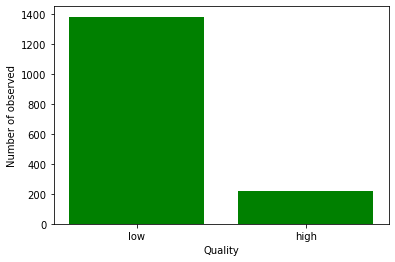

In [51]:
    # frequency in wine
    wine_q  = wines['quality'].value_counts()
    wine_quality = (list(wine_q.index), list(wine_q.values))
    
    plt.bar(wine_quality[0],wine_quality[1], color='green')
    plt.xlabel('Quality')
    plt.ylabel('Number of observed')
    plt.savefig(os.path.join(KATALOG_WYKRESOW,
                        'quality_by_frequency_2_categories.jpg'),
                dpi=300 )
    
    plt.show()
    #disparity, might help with good discrimimnation of low quality wines, hopefully

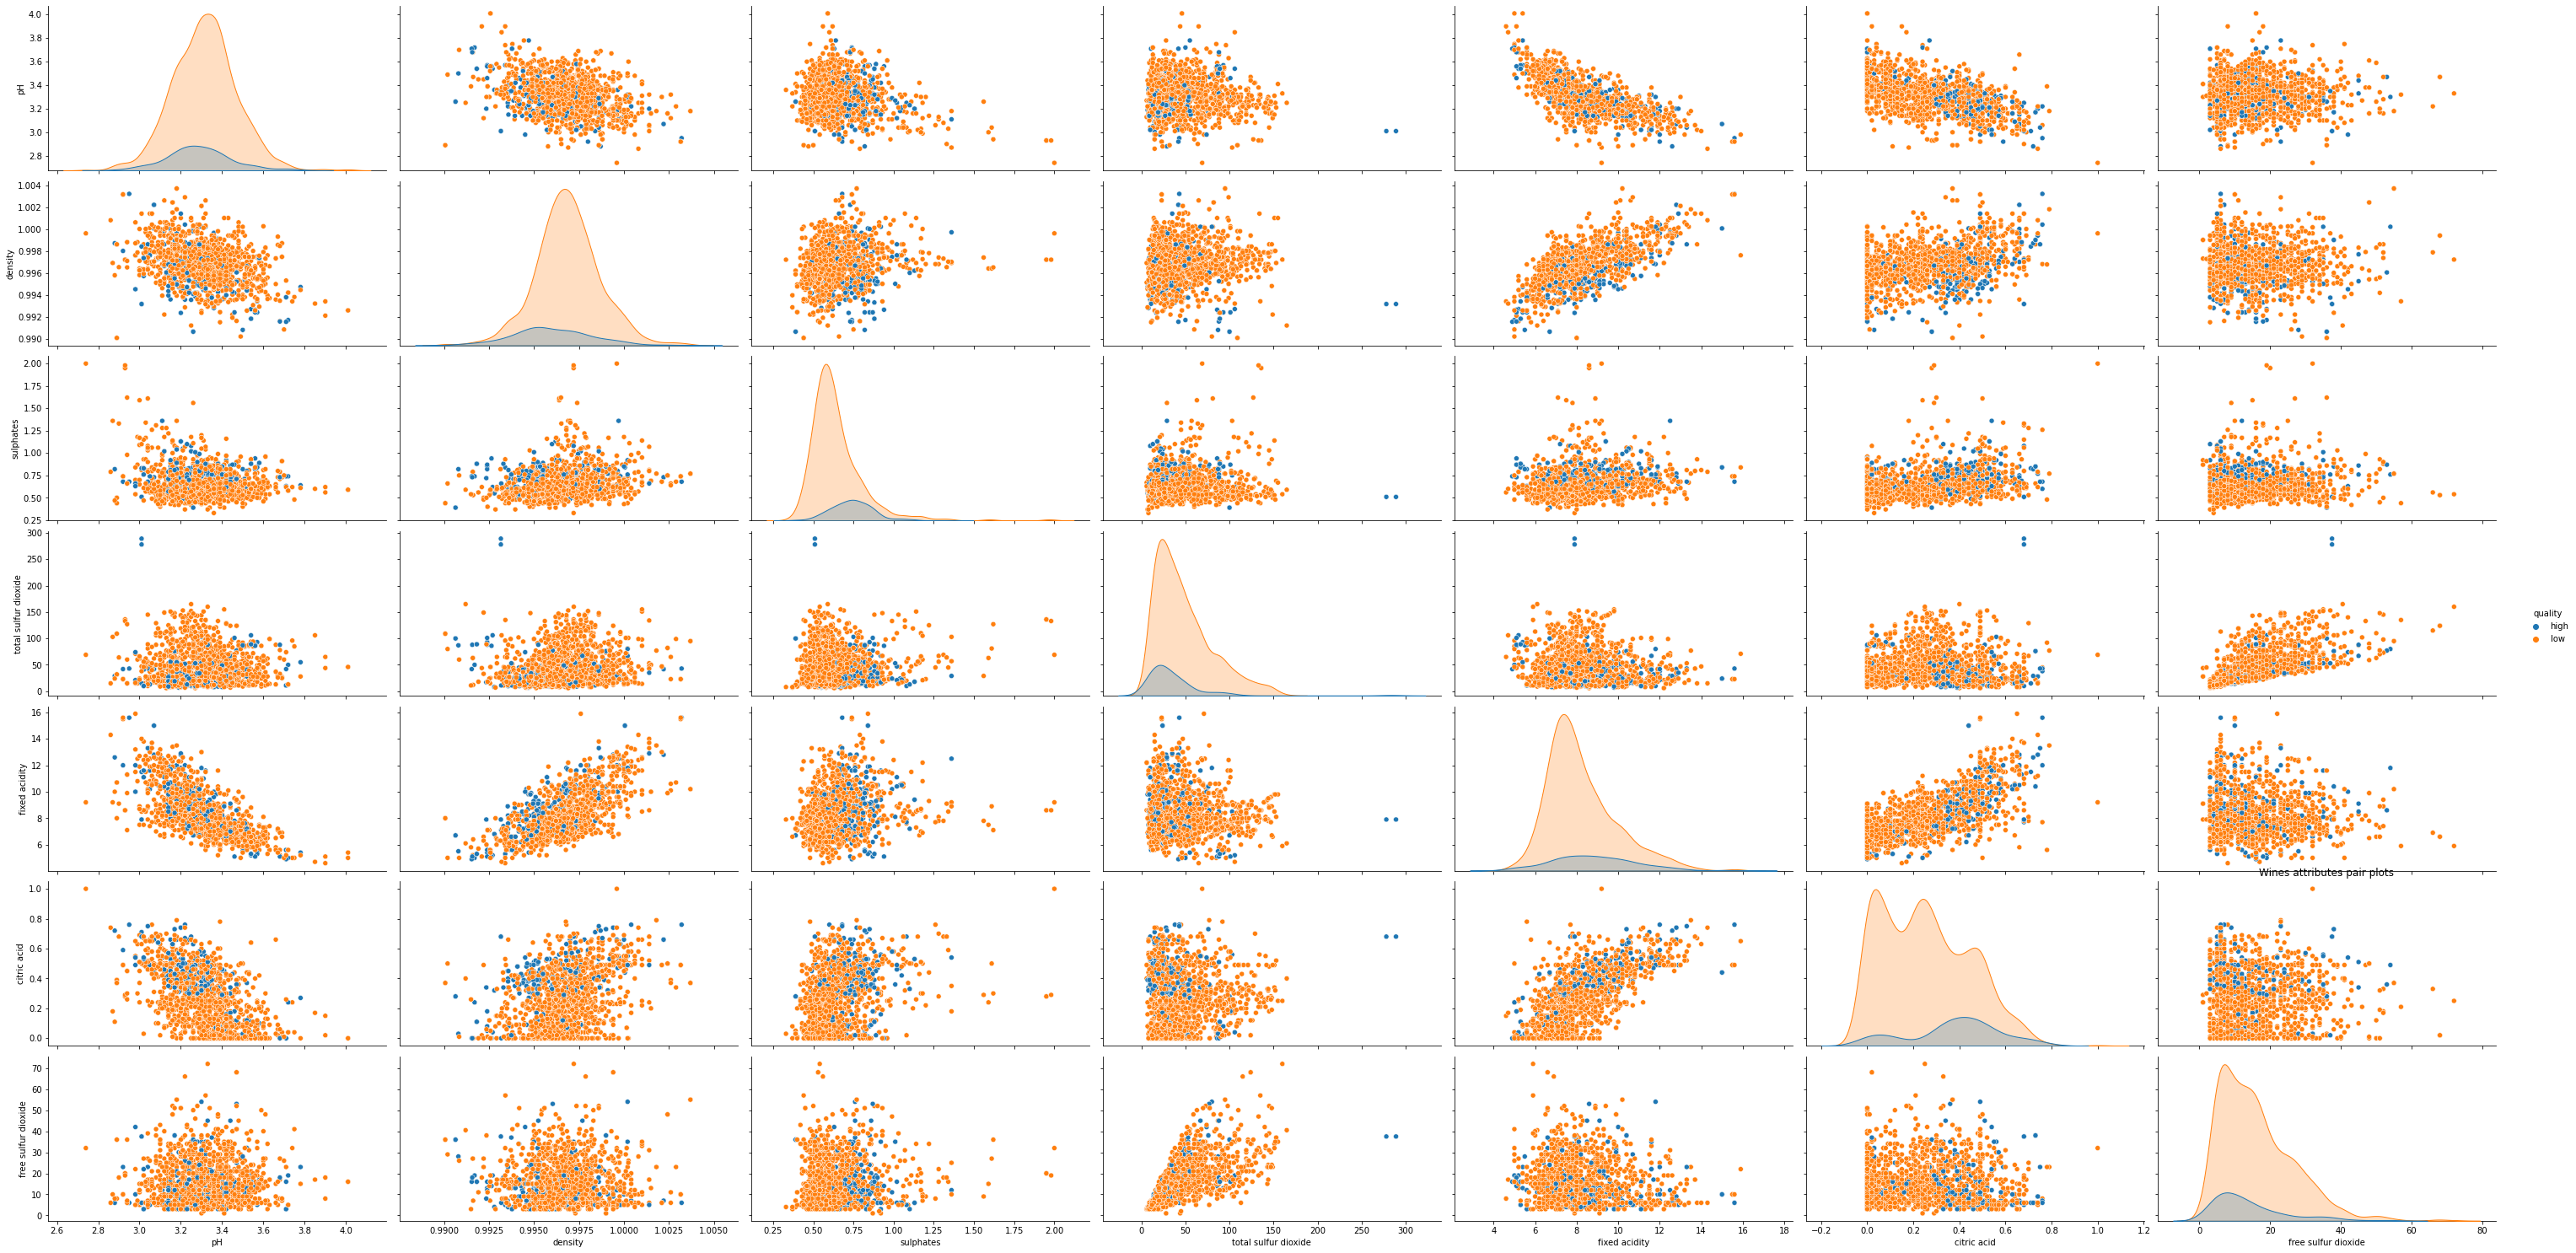

In [53]:
    #from strong correlations
    
    important_attr = ['quality','pH', 'density', 'sulphates',
                      'total sulfur dioxide', 'fixed acidity',
                      'citric acid','free sulfur dioxide']
    
    sns.pairplot(wines[important_attr], height=3, hue = 'quality',
                 aspect =2)
    #plt.title('Wines attributes pair plots')
    plt.savefig(os.path.join(KATALOG_WYKRESOW,'selected_correlations.jpg'), dpi=600 )
    
    plt.show()

    #outliers can be seen, but I wont remove them

Pairplot shows, that there are outliers in dataset, especially two blue dots in the total sulfur dioxide column/row which might be especially good wines, that stands out because of their age
'''
This is why it’s a good idea to build a solid foundation of TSO2; the more Total SO2 you have, the more stable the Free SO2 tends to be.
But if TSO2 levels are relatively predictable (compared to FSO2), and if FSO2 is more important for the overall protection of the wine,
'''

origin: https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too#:~:text=Simply%20put%2C%20Total%20Sulfur%20Dioxide,aldehydes%2C%20pigments%2C%20or%20sugars.

In [54]:
#skalowanie danych
from sklearn.preprocessing import LabelEncoder

labele = LabelEncoder()

wines['quality'] = labele.fit_transform(wines['quality'])
#label encoder transformed quality labels from low, high to
# --> high became 0, low became 1


In [55]:
attributes = wines.drop('quality', axis = 1) 
features =  wines['quality']
#nie trzeba tego robic, ale dla mnie dla przejrzystosci zrobilem

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(attributes, features,
                                        test_size = 0.2, random_state=131)

print('X_train shape',X_train.shape)
print('X_test shape',  X_test.shape)

X_train shape (1279, 11)
X_test shape (320, 11)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

Next cells are meant to gain intuition of each model behaviour
can be skipped as i imported necessary things separately

In [64]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
def SGD(X_train,y_train,X_test,y_test):
    stochasticgd = SGDClassifier(loss='perceptron', penalty='l2')
    stochasticgd.fit(X_train, y_train)
    sgd_pred = stochasticgd.predict(X_test)
    
    mse_sgd = MSE(y_test, sgd_pred)
    rmse_sgd = mse_sgd**(1/2)
    
    print('SGDClassifier')
    print(classification_report(y_test, sgd_pred))
    print(f'accurracy= {accuracy_score(y_test, sgd_pred):.4f}')
    print(f'mse = {mse_sgd:.4f}')
    print(f'rmse = {rmse_sgd:.4f}')
    print('*'*70)

SGD(X_train,y_train,X_test,y_test)

SGDClassifier
              precision    recall  f1-score   support

           0       0.42      0.67      0.52        42
           1       0.94      0.86      0.90       278

    accuracy                           0.84       320
   macro avg       0.68      0.76      0.71       320
weighted avg       0.88      0.84      0.85       320

accurracy= 0.8375
mse = 0.1625
rmse = 0.4031
**********************************************************************


In [66]:
def DTC(X_train,y_train,X_test,y_test):
    dtc = DecisionTreeClassifier(max_depth=4, random_state=1,
                                 criterion='gini')
    
    dtc.fit(X_train,y_train)
    
    dtc_pred = dtc.predict(X_test)
    mse_dtc = MSE(y_test, dtc_pred)
    rmse_dtc = mse_dtc**(1/2)
    
    print('Decision Tree Classifier')
    print(classification_report(y_test, dtc_pred))
    print(f'accurracy= {accuracy_score(y_test, dtc_pred):.4f}')
    print(f'mse = {mse_dtc:.4f}')
    print(f'rmse = {rmse_dtc:.4f}')
    print('*'*70)

DTC(X_train,y_train,X_test,y_test)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.68      0.50      0.58        42
           1       0.93      0.96      0.95       278

    accuracy                           0.90       320
   macro avg       0.80      0.73      0.76       320
weighted avg       0.89      0.90      0.90       320

accurracy= 0.9031
mse = 0.0969
rmse = 0.3112
**********************************************************************


In [67]:
def KNN(X_train,y_train,X_test,y_test):
    knn = KNeighborsClassifier(n_neighbors=8)   
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    
    mse_knn = MSE(y_test, knn_pred)
    rmse_knn= mse_knn**(1/2)
    
    print('KNeighborsClassifierier')
    print(classification_report(y_test, knn_pred))
    print(f'accurracy= {accuracy_score(y_test, knn_pred):.4f}')
    print(f'mse = {mse_knn:.4f}')
    print(f'rmse =  {rmse_knn:.5f}')
    print('*'*70)

KNN(X_train,y_train,X_test,y_test)

KNeighborsClassifierier
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        42
           1       0.92      0.96      0.94       278

    accuracy                           0.89       320
   macro avg       0.76      0.69      0.72       320
weighted avg       0.88      0.89      0.88       320

accurracy= 0.8875
mse = 0.1125
rmse =  0.33541
**********************************************************************


In [68]:
def LR(X_train,y_train,X_test,y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    
    mse_lr = MSE(y_test, lr_pred)
    rmse_lr= mse_lr**(1/2)
    
    print('LogisticRegression')
    print(classification_report(y_test, lr_pred))
    print(f'accurracy= {accuracy_score(y_test, lr_pred):.4f}')
    print(f'mse = {mse_lr:.4f}')
    print(f'rmse = {rmse_lr:.4f}')
    print('*'*70)

LR(X_train,y_train,X_test,y_test)

LogisticRegression
              precision    recall  f1-score   support

           0       0.61      0.33      0.43        42
           1       0.91      0.97      0.94       278

    accuracy                           0.88       320
   macro avg       0.76      0.65      0.68       320
weighted avg       0.87      0.88      0.87       320

accurracy= 0.8844
mse = 0.1156
rmse = 0.3400
**********************************************************************


In [69]:
def SVC(X_train,y_train,X_test,y_test):
    svc = LinearSVC(max_iter=10000)
    svc.fit(X_train, y_train)
    svc_pred = svc.predict(X_test)
    
    mse_svc= MSE(y_test, svc_pred)
    rmse_svc= mse_svc**(1/2)
    
    print('LinearSVC')
    print(classification_report(y_test, svc_pred))
    print(f'accurracy= {accuracy_score(y_test, svc_pred):.4f}')
    print(f'mse = {mse_svc:.4f}')
    print(f'rmse = {rmse_svc:.4f}')
    print('*'*70)
    
SVC(X_train,y_train,X_test,y_test)

LinearSVC
              precision    recall  f1-score   support

           0       0.71      0.24      0.36        42
           1       0.90      0.99      0.94       278

    accuracy                           0.89       320
   macro avg       0.80      0.61      0.65       320
weighted avg       0.87      0.89      0.86       320

accurracy= 0.8875
mse = 0.1125
rmse = 0.3354
**********************************************************************


In [70]:
def GBC(X_train,y_train,X_test,y_test):
    gbc = GradientBoostingClassifier()
    
    gbc.fit(X_train,y_train)
    gbc_pred = gbc.predict(X_test)
    
    mse_gbc= MSE(y_test, gbc_pred)
    rmse_gbc= mse_gbc**(1/2)
    
    print('GradientBoostingClassifier')
    print(classification_report(y_test, gbc_pred))
    print(f'accurracy= {accuracy_score(y_test, gbc_pred):.4f}')
    print(f'mse = {mse_gbc:.4f}')
    print(f'rmse = {rmse_gbc:.4f}')
    print('*'*70)

GBC(X_train,y_train,X_test,y_test)

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.67      0.43      0.52        42
           1       0.92      0.97      0.94       278

    accuracy                           0.90       320
   macro avg       0.79      0.70      0.73       320
weighted avg       0.89      0.90      0.89       320

accurracy= 0.8969
mse = 0.1031
rmse = 0.3211
**********************************************************************


In [71]:
def XGB(X_train,y_train,X_test,y_test):

    xg_cl = XGBClassifier(objective='binary:logistic',
    n_estimators=10, seed=123)
    xg_cl.fit(X_train, y_train)
    
    xgcl_preds = xg_cl.predict(X_test)
    
    mse_xgcl= MSE(y_test, xgcl_preds)
    rmse_xgcl= mse_xgcl**(1/2)
    
    print('XGB')
    print(classification_report(y_test, xgcl_preds))
    print(f'accurracy= {accuracy_score(y_test, xgcl_preds):.4f}')
    print(f'mse = {mse_xgcl:.4f}')
    print(f'rmse = {rmse_xgcl:.4f}')
    print('*'*70)

XGB(X_train,y_train,X_test,y_test)

XGB
              precision    recall  f1-score   support

           0       0.74      0.33      0.46        42
           1       0.91      0.98      0.94       278

    accuracy                           0.90       320
   macro avg       0.82      0.66      0.70       320
weighted avg       0.88      0.90      0.88       320

accurracy= 0.8969
mse = 0.1031
rmse = 0.3211
**********************************************************************


https://tinyurl.com/y2jdf9n7
F1 score - F1 Score is the weighted average of Precision and Recall. 
 Therefore, this score takes both false positives and false negatives into account. 
 Intuitively it is not as easy to understand as accuracy, 
 but F1 is usually more useful than accuracy, 
 especially if you have an uneven class distribution

 F1 Score = 2*(Recall * Precision) / (Recall + Precision)


Accuracy - Accuracy is the most intuitive performance measure and it is simply
 a ratio of correctly predicted observation to the total observations. 
 One may think that, if we have high accuracy then our model is best. 
 Yes, accuracy is a great measure but only when you have symmetric datasets 
 where values of false positive and false negatives are almost same.
 
 Accuracy = TP+TN/TP+FP+FN+TN
 
 
Precision - Precision is the ratio of correctly predicted positive observations
 to the total predicted positive observations. 
 High precision relates to the low false positive rate.
 
 Precision = TP/TP+FP
 
 
Recall (Sensitivity) - Recall is the ratio of correctly predicted
 positive observations to the all observations in actual class - yes. 
 /Of all trues, how many did model label true.
 
 Recall = TP/TP+FN

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB

In [73]:
scoring = ['accuracy','f1', 'recall','precision']

modele = [GradientBoostingClassifier(),LinearSVC(max_iter=10000),
          LogisticRegression(),GaussianNB(),
          KNeighborsClassifier(),XGBClassifier(),
          DecisionTreeClassifier(),SGDClassifier(penalty='l2',loss='log')]

In [74]:
def cvs (modele,X_train,y_train,X_test,y_test):
    acc_dict  = {}
    f1_dict   = {}
    rec_dict  = {}
    prec_dict = {}
    
    for model in modele:
        clf = model.fit(X_train, y_train)
        clf_scores = cross_validate(clf, X_train, y_train,
                              scoring=scoring, cv=10)
        
        acc_dict[str(model)[:-2]] = clf_scores['test_accuracy']
        f1_dict[str(model)[:-2]] = clf_scores['test_f1']
        rec_dict[str(model)[:-2]] = clf_scores['test_recall']
        prec_dict[str(model)[:-2]] = clf_scores['test_precision']
    return acc_dict,f1_dict, rec_dict, prec_dict

In [75]:
stats = cvs(modele,X_train,y_train,X_test,y_test)

models = list(stats[0].keys())
#sml stands for scores_means_list
sml = [np.array(list(x.values())).mean(axis=1) for x in stats]

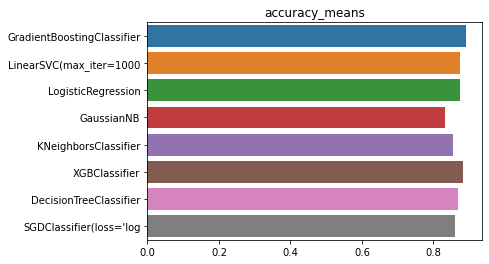

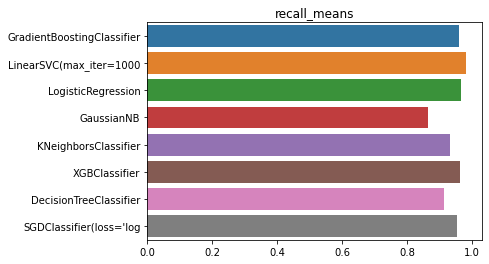

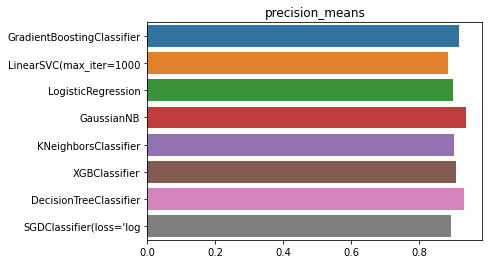

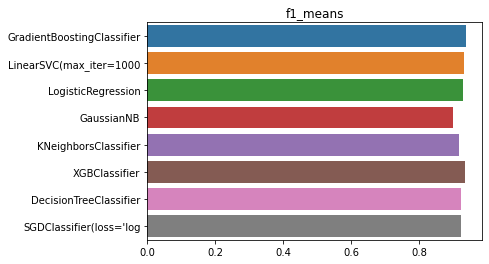

In [76]:
sp = sns.barplot(x=sml[0], y=models).set_title('accuracy_means')
plt.savefig(os.path.join(KATALOG_WYKRESOW,'accuracy_between_models.jpg'), dpi=300 )
plt.show()

sns.barplot(x=sml[2], y=models).set_title('recall_means')
plt.savefig(os.path.join(KATALOG_WYKRESOW,'recall_between_models.jpg'), dpi=300 )
plt.show()

sns.barplot(x=sml[3], y=models).set_title('precision_means')
plt.savefig(os.path.join(KATALOG_WYKRESOW,'precision_between_models.jpg'), dpi=300 )
plt.show()

sns.barplot(x=sml[1], y=models).set_title('f1_means')
plt.savefig(os.path.join(KATALOG_WYKRESOW,'f1_betweem_models.jpg'), dpi=300 )
plt.show()

In [77]:
for i, scorer in enumerate(['accuracy','f1','recall','precision']):
    print(f"{scorer} := biggest_mean -> {sml[i].max():.4f}"
          f" model := {models[np.argmax(sml[i])]}\n")

accuracy := biggest_mean -> 0.8921 model := GradientBoostingClassifier

f1 := biggest_mean -> 0.9390 model := GradientBoostingClassifier

recall := biggest_mean -> 0.9828 model := LinearSVC(max_iter=1000

precision := biggest_mean -> 0.9383 model := GaussianNB



as the winner of f1 score is the GradientBoostingClassifier, 
and f1 score takes both recall and precision into account,
and it also wins in the accuracy test.
As I think here false negatives and false negatives are of crucial role,
remember high quality wines otnumber low quality by a big margin, 
there are circa 6 times more low quality wines than high

So the double Winning GradientBoostingClassifier is a go to there/

In [78]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

X, y = attributes, features

model = GradientBoostingClassifier()
default_params = model.get_params()
print(default_params)#aby wiedziec co mozna zmieniac, 

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
#LICZY OKOLO GODZINE, poniezej moje wyniki, 
#nie skorzystalem z grid search, ponieważ za duza 'mapa' parametrow
#i szukanie trwaloby wiele lat
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.608, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10,100,1000,10000]
    }

number_combinations = 1
for i in parameters:
    number_combinations *= len(i)


cv_random = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
        param_distributions=parameters, n_iter=100,
        scoring='f1',
        n_jobs=-1,
        refit=True,
        cv=10, verbose=1,
        return_train_score=True)
    
search = cv_random.fit(X_train,y_train)

best_score = search.best_score_
best_params = search.best_params_
print(search.best_score_)
print(search.best_params_)

In [79]:
#results from cell above, if wanted to run again delete this cell
best_score = 0.9457450478391032
best_params = {'subsample': 1.0, 
                'n_estimators': 1000,
                'min_samples_split': 0.2090909090909091,
                'min_samples_leaf': 0.1, 
                'max_features': 'log2', 
                'max_depth': 5, 
                'loss': 'deviance', 
                'learning_rate': 0.1, 
                'criterion': 'friedman_mse'}

print(best_score)
print(best_params)

0.9457450478391032
{'subsample': 1.0, 'n_estimators': 1000, 'min_samples_split': 0.2090909090909091, 'min_samples_leaf': 0.1, 'max_features': 'log2', 'max_depth': 5, 'loss': 'deviance', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}


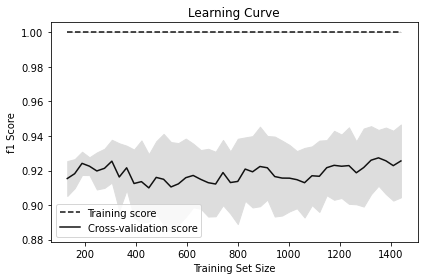

In [81]:
from sklearn.model_selection import  learning_curve

train_sizes, train_scores, test_scores =\
    learning_curve(GradientBoostingClassifier().set_params(**best_params), 
                   X, y,
                   cv=10,
                   scoring='f1',
                   n_jobs=-1, 
                   train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("f1 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.savefig(os.path.join(KATALOG_WYKRESOW,'learning_curve.jpg'), dpi=300 )
plt.show()

In [96]:
gbcc = GradientBoostingClassifier().set_params(**best_params)
    
gbcc.fit(X_train,y_train)
gbc_pred = gbcc.predict(X_test)
    
mse_gbc= MSE(y_test, gbc_pred)
rmse_gbc= mse_gbc**(1/2)
    
print('GradientBoostingClassifier')
print(classification_report(y_test, gbc_pred))
print(f'accurracy= {accuracy_score(y_test, gbc_pred):.4f}')
print(f'mse = {mse_gbc:.4f}')
print(f'rmse = {rmse_gbc:.4f}')
print('*'*70)

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        42
           1       0.95      0.97      0.96       278

    accuracy                           0.93       320
   macro avg       0.85      0.81      0.82       320
weighted avg       0.92      0.93      0.92       320

accurracy= 0.9250
mse = 0.0750
rmse = 0.2739
**********************************************************************


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

scoresgbc = cross_val_score(gbcc, 
                            X_train, y_train, 
                            scoring='f1', 
                            cv=10,
                            n_jobs=-1)



print(f'cross validation score: {scoresgbc.mean():.4f}')

print(f'f1: {np.mean(scoresgbc):.4f},  std: {np.std(scoresgbc):.4f}')

y_pred_train = gbcc.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'f1 on training set: {f1_train:.4f}')

y_pred_test = gbcc.predict(X_test)
f1_test = f1_score(y_test, y_pred_test)
print(f'f1 on test set: {f1_test:.4f}\n')

print(classification_report(y_test, y_pred_test))

print(f'accuracy on test set: {accuracy_score(y_test,y_pred_test)}')

cross validation score: 0.9468
f1: 0.9468,  std: 0.0115
f1 on training set: 1.0000
f1 on test set: 0.9573

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        42
           1       0.95      0.97      0.96       278

    accuracy                           0.93       320
   macro avg       0.85      0.81      0.82       320
weighted avg       0.92      0.93      0.92       320

accuracy on test set: 0.925


It does have f1 score of 1.0 on training set, meaning it has learned it, overfitting may occur, 
but f1 on test shows 0.957 score which is a good one, 
probably because the dataset isnt too big

In [98]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

[[ 27  15]
 [  9 269]]


[[0.084375 0.046875]
 [0.028125 0.840625]]


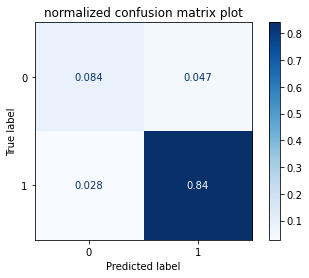

In [99]:
#at last lets get confusion matrix plot
from sklearn.metrics import plot_confusion_matrix

labels=['true negatives','false positives','false negatives','true positives']

disp = plot_confusion_matrix(gbcc, X_test, y_test,
                             cmap=plt.cm.Blues,
                             normalize='all')

disp.ax_.set_title('normalized confusion matrix plot')
print(disp.confusion_matrix)
plt.show()

In [100]:
from sklearn.metrics import  roc_curve, auc

y_scores = gbcc.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

print(f'area under curve: {roc_auc:.4f}')

area under curve: 0.9322


So I ended up with accuracy on the test set of 0.9313, 
4% better than without hyperparameters
and cv score of 0.9424(f1), and 0.8991(accuracy)
got 0.85 of true positives(271) which is not bad 
considering small size of data,
it seems that algorithm has efficiently learned,
which are the best chemical traits, to select a good wine,
what a shame they don't put those on wine labels...
maybe, next step, -> indentify wine by etiquette ->
connect with database of those chemical properties,
-> return answer.   